In [7]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [8]:
df1=pd.read_excel('tweets_beforecoup.xlsx', engine='openpyxl')

In [9]:
df1=df1[['content','date','polarity']]

In [10]:
df1=df1.dropna()

In [11]:
df1.copy()
df1["polarity"].replace({"nt": "Neutral", "p": "Positive","n":"Negative",'np':'Negative'}, inplace=True)

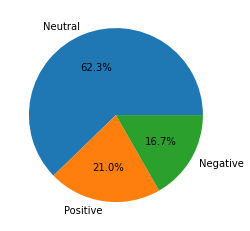

Neutral     625
Positive    211
Negative    168
Name: polarity, dtype: int64

In [12]:
plt.pie(df1['polarity'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%1.1f%%')
plt.show()
df1['polarity'].value_counts()


In [13]:
df2=pd.read_excel('tweets_aftercoup.xlsx', engine='openpyxl')

In [ ]:
df2

In [14]:
df2=df2[['content','date','polarity ']]

In [15]:
df2=df2.rename(columns = {'polarity ':'polarity'})

In [16]:
df2.copy()
df2["polarity"].replace({"nt": "Neutral", "p": "Positive","n":"Negative",'np':'Negative'}, inplace=True)

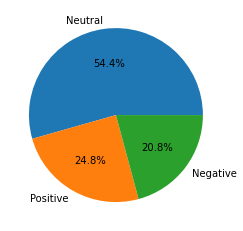

Neutral     544
Positive    248
Negative    208
Name: polarity, dtype: int64

In [17]:
plt.pie(df2['polarity'].value_counts(),labels=['Neutral','Positive','Negative'],autopct='%1.1f%%')
plt.show()
df2['polarity'].value_counts()

In [18]:
df=pd.concat([df1,df2])

In [19]:
df=df.reset_index()

In [20]:
df

,index,content,date,polarity
0,0,Başkanlık sistemi gelirse Türkiye daha büyük T...,2016-04-28 16:33:48+00:00,Positive
1,1,Başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"Odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,Baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,Kürsü Genç Hukukçularda\nParlamenter ve Başkan...,2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
1999,995,Başkanlık sistemi tartışması Cumhurbaşkanı Erd...,2016-10-27 09:39:21+00:00,Neutral
2000,996,.@Medyascopetv #Periscope'ta: Başkanlık sistem...,2016-10-27 09:38:40+00:00,Neutral
2001,997,.@Medyascopetv auf #Periscope: Başkanlık siste...,2016-10-27 09:37:17+00:00,Neutral
2002,998,İşte Amerikan başkanlık sistemi https://t.co/M...,2016-10-27 09:36:55+00:00,Neutral


# PREPROCESSING

In [21]:
import re

In [22]:
df['content'] = [token.lower() for token in df['content']]
df.head(5)

,index,content,date,polarity
0,0,başkanlık sistemi gelirse türkiye daha büyük t...,2016-04-28 16:33:48+00:00,Positive
1,1,başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,kürsü genç hukukçularda\nparlamenter ve başkan...,2016-04-28 16:30:50+00:00,Neutral


In [23]:
found = df[df['content'].str.contains('\n')]
found.count()

index       407
content     407
date        407
polarity    407
dtype: int64

In [24]:
df['content'] = df['content'].replace('\n', '', regex=True)
found = df[df['content'].str.contains('\n')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

In [25]:
found = df[df['content'].str.contains('@')]
found.count()

index       523
content     523
date        523
polarity    523
dtype: int64

In [26]:
df['content'] = df['content'].replace('@[A-Za-z0-9_]+', '', regex=True).replace('@[A-Za-z0-9_]', '', regex=True)
found = df[df['content'].str.contains('@')]
found.count()

index       4
content     4
date        4
polarity    4
dtype: int64

In [27]:
df[df['content'].str.contains('@')]

,index,content,date,polarity
626,626,yeni anayasa ve başkanlık sistemi değerli mill...,2016-04-23 14:24:14+00:00,Neutral
633,633,yeni anayasa ve baskanlik sistemi - metin kulu...,2016-04-23 14:03:34+00:00,Neutral
691,691,bakan kılıç: başkanlık sistemi türkiye’nin önü...,2016-04-22 18:40:54+00:00,Neutral
1170,166,#nextstation #başkanlıksistemi 😎 @ beyoğlu ta...,2016-10-29 17:15:30+00:00,Positive


In [28]:
df['content'] = df['content'].replace('@', '', regex=True)
found = df[df['content'].str.contains('@')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

In [29]:
df['content'] = df['content'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
found = df[df['content'].str.contains('http')]
found.count()

index       0
content     0
date        0
polarity    0
dtype: int64

# Remove Punctuations, Emojis and Numbers

In [30]:
sentences = df['content'].copy()
new_sent = []
i = 0
for sentence in sentences:
    new_sentence = re.sub('[0-9]+', '', sentence)
    new_sent.append(new_sentence)
    i += 1
    
df['content'] = new_sent
df

,index,content,date,polarity
0,0,başkanlık sistemi gelirse türkiye daha büyük t...,2016-04-28 16:33:48+00:00,Positive
1,1,başkanlık sistemi ile acaba bugünkü muktedirle...,2016-04-28 16:33:45+00:00,Negative
2,2,"odaklandığın başkanlık sistemi, başını yer inş...",2016-04-28 16:31:56+00:00,Negative
3,3,baskanlik sistemi gelirse bu ulke biter ama in...,2016-04-28 16:31:38+00:00,Negative
4,4,kürsü genç hukukçulardaparlamenter ve başkanlı...,2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
1999,995,başkanlık sistemi tartışması cumhurbaşkanı erd...,2016-10-27 09:39:21+00:00,Neutral
2000,996,. #periscope'ta: başkanlık sistemi geliyor mu?...,2016-10-27 09:38:40+00:00,Neutral
2001,997,. auf #periscope: başkanlık sistemi geliyor mu...,2016-10-27 09:37:17+00:00,Neutral
2002,998,i̇şte amerikan başkanlık sistemi aracılığıyla,2016-10-27 09:36:55+00:00,Neutral


In [31]:
import string

table = str.maketrans('', '', string.punctuation)
sentences = df['content'].copy()
new_sent = []
for sentence in sentences:
    words = sentence.split()
    stripped = [w.translate(table) for w in words]
    new_sent.append(stripped)


In [32]:
df['content'] = new_sent
df

,index,content,date,polarity
0,0,"[başkanlık, sistemi, gelirse, türkiye, daha, b...",2016-04-28 16:33:48+00:00,Positive
1,1,"[başkanlık, sistemi, ile, acaba, bugünkü, mukt...",2016-04-28 16:33:45+00:00,Negative
2,2,"[odaklandığın, başkanlık, sistemi, başını, yer...",2016-04-28 16:31:56+00:00,Negative
3,3,"[baskanlik, sistemi, gelirse, bu, ulke, biter,...",2016-04-28 16:31:38+00:00,Negative
4,4,"[kürsü, genç, hukukçulardaparlamenter, ve, baş...",2016-04-28 16:30:50+00:00,Neutral
...,...,...,...,...
1999,995,"[başkanlık, sistemi, tartışması, cumhurbaşkanı...",2016-10-27 09:39:21+00:00,Neutral
2000,996,"[, periscopeta, başkanlık, sistemi, geliyor, m...",2016-10-27 09:38:40+00:00,Neutral
2001,997,"[, auf, periscope, başkanlık, sistemi, geliyor...",2016-10-27 09:37:17+00:00,Neutral
2002,998,"[i̇şte, amerikan, başkanlık, sistemi, aracılığ...",2016-10-27 09:36:55+00:00,Neutral


# Tokenization

In [34]:
import time
import logging

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

logger = logging.getLogger(__name__)

morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)
extractor = TurkishSentenceExtractor()

2022-05-18 22:18:39,021 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 14.430339097976685



# Normalization

In [35]:
def normalize_long_text(text):
    normalized_sentences = [normalizer.normalize(word) for word in text]
    normalized_text = " ".join(normalized_sentences)
    return normalized_text

In [36]:
sentences = df['content'].copy()
new_sent = []
start = time.time()

for token in sentences:   
    if token.count('') > 0:
        token = list(filter(('').__ne__, token))
    new_token = normalize_long_text(token)
    new_sent.append(new_token)

logger.info(f"Sentences normalized in: {time.time() - start} s")

2022-05-18 22:21:37,428 - __main__ - INFO
Msg: Sentences normalized in: 148.55167889595032 s



# Stopwords

In [33]:
from nltk.corpus import stopwords


stops = set(stopwords.words('turkish'))
print(stops)

{'tüm', 'birşey', 'en', 'bazı', 'birkaç', 'hepsi', 'belki', 'az', 'hem', 'ki', 'nerde', 'çok', 've', 'ise', 'nasıl', 'gibi', 'hep', 'kez', 'hiç', 'biz', 'nereye', 'niye', 'sanki', 'da', 'ama', 'mu', 'niçin', 'yani', 'biri', 'de', 'için', 'kim', 'neden', 'nerede', 'daha', 'şu', 'ya', 'veya', 'ne', 'şey', 'aslında', 'defa', 'diye', 'o', 'acaba', 'bu', 'mı', 'ile', 'mü', 'siz', 'çünkü', 'her', 'eğer'}


In [37]:
splitted_words = []
for sent in new_sent:
    words = sent.split()
    splitted_words.append(words)

In [38]:
clean_sent = []
for sentence in splitted_words:
    new_sentence = [w for w in sentence if w not in stops]
    clean_sent.append(new_sentence)

# Lemmatization

In [39]:
for token in clean_sent:
    j = 0
    for word in token:
        new_word = word.replace('"', '').replace("’", '').replace("'", '').replace("”", '')
        token[j] = new_word
        j += 1

In [ ]:
import zeyrek


analyzer = zeyrek.MorphAnalyzer()
lem_sent = []
for sent in clean_sent:
    normalized_sent = []
    for word in sent:
        if word == '':
            continue
        else:
            lem_word = analyzer.lemmatize(word)
            normalized_sent.append(lem_word[0][1][0])
    lem_sent.append(normalized_sent)

In [ ]:
x = lem_sent.copy()
for sent in x:
    i = 0
    for token in sent:
        sent[i] = token.lower()
        i += 1
lem_sent = x

In [41]:
lem_sent = list(filter(('').__ne__, lem_sent))

In [42]:
df['content'] = lem_sent
df['content'].head(5)

0    [başkan, sistem, gelmek, Türkiye, Büyük, Türki...
1    [başkan, sistem, bugün, muktedir, hangi, yetki...
2    [odaklamak, başkan, sistem, baş, yermek, inşal...
3    [başkan, sistem, gelmek, ülke, bitmek, insan, ...
4    [kür, Genç, hukukçulardaparlamenter, başkan, s...
Name: content, dtype: object

In [43]:
df['content'] = df.content.apply(' '.join)

In [ ]:
df.to_csv('tweets_lemmatized.csv')